# **Practical Lab on Audio Modeling and Control Using AnCoGen**
---


## What is AnCoGen ?

AnCoGen is a novel method that leverages a *masked autoencoder* to unify the analysis, control, and generation of speech signals within a single model. AnCoGen can **analyze** speech by estimating key attributes, such as speaker identity, pitch, content, loudness, signal-to-noise ratio, and clarity index. In addition, it can **generate** speech from these attributes and allow precise control of the synthesized speech by modifying them.

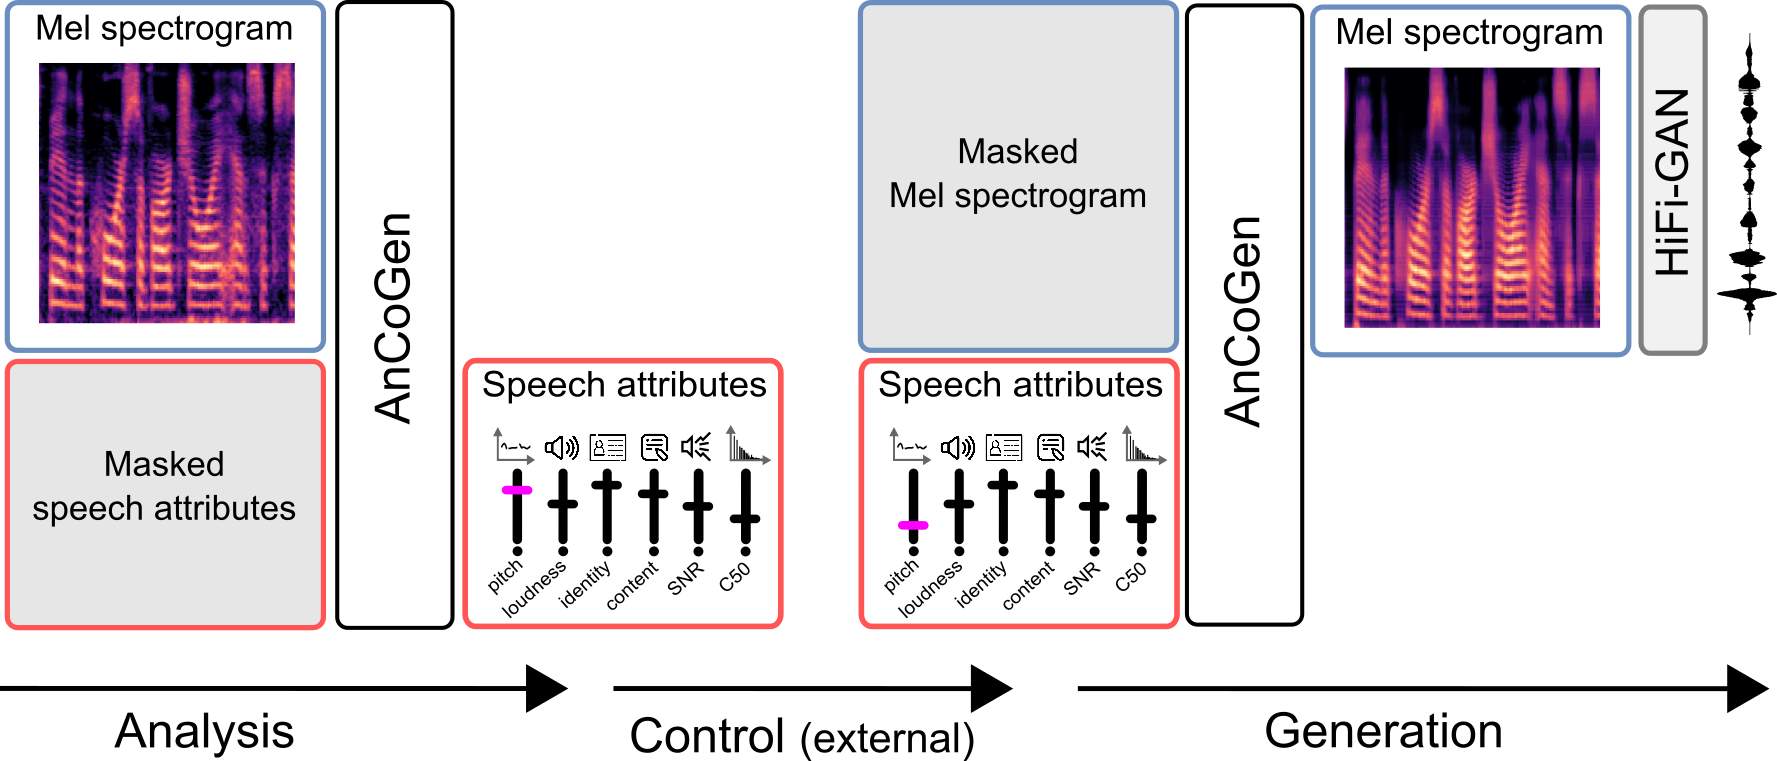

## Objective of the Lab

The purpose of this lab is to **explore the AnCoGen model** introduced in the research paper.  
By the end of this session, you will be able to:

- Understand the main concepts behind AnCoGen.
- Manipulate a **pre-trained model** for speech **analysis**, **generation**, and **control**.
- Connect theoretical concepts from the paper to practical experiments.

💡 *This lab bridges the gap between reading a scientific article and applying the described model in practice.*

## 📅 TP Schedule

1. **Tool Familiarization**  
   Students explore and test the provided helper functions, which will be essential for the following coding tasks.

2. **Hands-on Coding**  
   - **Audio Analysis**: Implement functions to extract speech attributes.  
   - **Speech Synthesis**: Use the pre-trained model to generate speech from attributes.  
   - **Speech Control**: Modify specific attributes to control the generated speech (Speech Enhancement).  
   - *(Bonus)* **Voice Conversion** for those who complete the main tasks ahead of time.




# Quiz and warm-up

__Here is the support to answer questions/quizzes:__ [https://arxiv.org/pdf/2501.05332](https://arxiv.org/pdf/2501.05332)



In [ ]:
# @title 1. Speech representation
import ipywidgets as widgets
from IPython.display import display, clear_output

questions = [
    {"q": "Which of the following are high-level speech attributes (SAs) used in the AnCoGen model?",
     "options": [
         "Output embedding vector sequence from HuBERT",
         "Pitch contour f0",
         "Loudness (RMS signal level)",
         "Speaker identity",
         "Signal-to-noise ratio (SNR)",
         "Clarity index C50",
         "All of the above"
     ],
     "correct": "All of the above"},
    {"q": "What does the pitch contour f0 represent in speech processing?",
     "options": ["The perceived speed of speaking", "The fundamental frequency of the voice, measured in Hz", "The loudness level of the speech signal", 'The clarity of speech in reverberant conditions'], "correct": "The fundamental frequency of the voice, measured in Hz"},
]

score = 0
index = 0

def afficher_question():
    global index
    clear_output()
    if index < len(questions):
        q = questions[index]

        # Afficher la question en grand et sur plusieurs lignes
        question_label = widgets.HTML(f"<h3>{q['q']}</h3>")

        # Options
        rb = widgets.RadioButtons(
            options=q["options"],
            description='',
            layout=widgets.Layout(width='50%')
        )

        bouton = widgets.Button(description="Valider", button_style='info')

        def verifier(b):
            global score, index
            if rb.value == q["correct"]:
                score += 1
            index += 1
            afficher_question()

        bouton.on_click(verifier)

        display(question_label, rb, bouton)
    else:
        print(f"Quiz terminé ✅ Score : {score}/{len(questions)}")

afficher_question()

HTML(value='<h3>Which of the following are high-level speech attributes (SAs) used in the AnCoGen model?</h3>'…

RadioButtons(layout=Layout(width='50%'), options=('Output embedding vector sequence from HuBERT', 'Pitch conto…

Button(button_style='info', description='Valider', style=ButtonStyle())

In [ ]:
# @title 2. Token representations
import ipywidgets as widgets
from IPython.display import display, clear_output

questions = [
    {
        "q": "How is the speech content (A1: HuBERT representation) quantized in AnCoGen?",
        "options": [
            "By rounding real-valued vectors to the nearest integer",
            "Using k-means clustering on the feature representations",
            "By applying a Mel filterbank",
            "By computing the pitch contour"
        ],
        "correct": "Using k-means clustering on the feature representations"
    },
    {
        "q": "What is the main role of tokenization in the speech representation pipeline?",
        "options": [
            "To split the speech waveform into syllables for easier processing",
            "To convert continuous features into discrete units for model input",
            "To compress the audio signal by removing silent parts",
            "To normalize pitch and loudness values"
        ],
        "correct": "To convert continuous features into discrete units for model input"
    }
]

score = 0
index = 0

def afficher_question():
    global index
    clear_output()
    if index < len(questions):
        q = questions[index]

        # Afficher la question en grand et sur plusieurs lignes
        question_label = widgets.HTML(f"<h3>{q['q']}</h3>")

        # Options
        rb = widgets.RadioButtons(
            options=q["options"],
            description='',
            layout=widgets.Layout(width='50%')
        )

        bouton = widgets.Button(description="Valider", button_style='info')

        def verifier(b):
            global score, index
            if rb.value == q["correct"]:
                score += 1
            index += 1
            afficher_question()

        bouton.on_click(verifier)

        display(question_label, rb, bouton)
    else:
        print(f"Quiz terminé ✅ Score : {score}/{len(questions)}")

afficher_question()

HTML(value='<h3>How is the speech content (A1: HuBERT representation) quantized in AnCoGen?</h3>')

RadioButtons(layout=Layout(width='50%'), options=('By rounding real-valued vectors to the nearest integer', 'U…

Button(button_style='info', description='Valider', style=ButtonStyle())

In [ ]:
# @title 3. Masking strategy
import ipywidgets as widgets
from IPython.display import display, clear_output

questions = [
    {
        "q": "What is the purpose of the 'coupled' masking strategy in AnCoGen training?",
        "options": [
            "To learn only the dependencies within each representation",
            "To learn both inter- and intra-representation dependencies",
            "To prevent the model from using the MS tokens",
            "To improve the time-frequency resolution"
        ],
        "correct": "To learn both inter- and intra-representation dependencies"
    },
    {
        "q": "Which masking strategy is used during inference in AnCoGen?",
        "options": [
            "Coupled masking strategy",
            "All or nothing masking strategy",
            "Random masking with variable ratio",
            "No masking at all"
        ],
        "correct": "All or nothing masking strategy"
    }
]


score = 0
index = 0

def afficher_question():
    global index
    clear_output()
    if index < len(questions):
        q = questions[index]

        # Afficher la question en grand et sur plusieurs lignes
        question_label = widgets.HTML(f"<h3>{q['q']}</h3>")

        # Options
        rb = widgets.RadioButtons(
            options=q["options"],
            description='',
            layout=widgets.Layout(width='50%')
        )

        bouton = widgets.Button(description="Valider", button_style='info')

        def verifier(b):
            global score, index
            if rb.value == q["correct"]:
                score += 1
            index += 1
            afficher_question()

        bouton.on_click(verifier)

        display(question_label, rb, bouton)
    else:
        print(f"Quiz terminé ✅ Score : {score}/{len(questions)}")

afficher_question()

HTML(value="<h3>What is the purpose of the 'coupled' masking strategy in AnCoGen training?</h3>")

RadioButtons(layout=Layout(width='50%'), options=('To learn only the dependencies within each representation',…

Button(button_style='info', description='Valider', style=ButtonStyle())

# Code


---

⚠ **Before continuing, you must log into the GPU or TPU session on Google Colab.**

## ⚡ Connecting to a GPU session in Google Colab

1. **Open the runtime settings**  
   - In Colab, go to the top menu and click **`Runtime`**.  
   - Select **`Change runtime type…`**.

2. **Enable GPU**  
   - In the **`Hardware accelerator`** dropdown, choose **`GPU`**.  
   - Click **`Save`**.

3. **Check the connection**  
   - In a code cell or in terminal, run:  
     ```python
     !nvidia-smi
     ```  
     You should see details about the GPU (e.g., Tesla T4).

> 💡 **Tip:** If your session disconnects or expires, repeat these steps.






In [ ]:
# @title Dependencies
!git clone https://github.com/samsad35/code-ancogen
!pip install pysptk onnxruntime pystoi resemblyzer
!pip install hydra-core
!pip install huggingface_hub
!pip install torchcodec
!pip install torchcrepe

Cloning into 'code-ancogen'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 117 (delta 19), reused 113 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (117/117), 2.55 MiB | 6.50 MiB/s, done.
Resolving deltas: 100% (19/19), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.2 MB/s eta 0:00:00


> ⚠️ After a moment, it will ask you to restart the session. Click on
“Restart session” and re-run this section to finish installing the package..

In [ ]:
# @title Download the models
from huggingface_hub import hf_hub_download
import zipfile
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SyntaxWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# -----------------------------------------------------------------------------
# This lab uses 3 pretrained components:
# 1) AnCoGen (the main model)
# 2) HiFi-GAN (vocoder)
# 3) VQ-VAE (tokenizer / decoder)
# -----------------------------------------------------------------------------

# 1) Download + extract AnCoGen
file_path = hf_hub_download(
    repo_id="samir-sadok/AnCoGen-LibriSpeech",
    filename="2024-4-8.zip",
    repo_type="model",
)
with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall("ancogen_model")
print("Model AnCoGen... [1/3]")

# 2) Download + extract HiFi-GAN
file_path = hf_hub_download(
    repo_id="samir-sadok/Hifigan-LibriSpeech",
    filename="HIFI_GAN.zip",
    repo_type="model",
)
with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall("hifigan_model")
print("Model HIFI-GAN... [2/3]")

# 3) Download + extract VQ-VAE
file_path = hf_hub_download(
    repo_id="samir-sadok/AnCoGen-VQVAE-LibriSpeech",
    filename="2024-2-3.zip",
    repo_type="model",
)
with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall("vqvae_model")
print("Model VQ-VAE... [3/3]")


2024-4-8.zip:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Model AnCoGen... [1/3]


HIFI_GAN.zip:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Model HIFI-GAN... [2/3]


2024-2-3.zip:   0%|          | 0.00/2.49M [00:00<?, ?B/s]

Model VQ-VAE... [3/3]


In [ ]:
# @title Load the downloaded models to the GPU
import sys
import os
import torch
from hydra.core.global_hydra import GlobalHydra
from hydra import initialize_config_dir, compose

# Make sure the cloned repository is on the Python path (Colab default path)
sys.path.append("/content/code-ancogen")

from src import SpeechVQVAE, HifiganGenerator, AnCoGen, NestAnCoGen, LibriSpeech  # noqa: E402

# -----------------------------------------------------------------------------
# Paths (match the folders created in the download cell)
# -----------------------------------------------------------------------------
path_ancogen = "/content/ancogen_model/2024-4-8/12-15"
path_hifigan = "/content/hifigan_model/HIFI_GAN/model-best.pt"
path_vqvae = "/content/vqvae_model/2024-2-3/18-12/model_checkpoint"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# -----------------------------------------------------------------------------
# Load Hydra config used by the AnCoGen repo
# -----------------------------------------------------------------------------
def _load_cfg():
    # In Colab, the repo is cloned at /content/code-ancogen
    conf_dir = "/content/code-ancogen/conf"
    if not os.path.isdir(conf_dir):
        raise FileNotFoundError(f"Config directory not found: {conf_dir}")

    # Reset Hydra if already initialized
    try:
        GlobalHydra.instance().clear()
    except Exception:
        pass

    with initialize_config_dir(config_dir=conf_dir, version_base=None):
        # Most repos expose 'config.yaml' as the main entry point.
        # If your local repo uses a different name, change it here.
        cfg = compose(config_name="config")
    return cfg

cfg = _load_cfg()

# ------------------------------------------------------------------------------
# Load HiFi-GAN (vocoder)
# ------------------------------------------------------------------------------
generator = HifiganGenerator()
generator.load_pretrained_model(load_path=path_hifigan)
generator.to(device)
generator.eval()

# ------------------------------------------------------------------------------
# Load VQ-VAE (tokenizer / decoder)
# ------------------------------------------------------------------------------
vqvae = SpeechVQVAE(**cfg.vqvae, mel_input=True)
vqvae.load(path_vqvae)
vqvae = vqvae.to(device)
vqvae.eval()

# ------------------------------------------------------------------------------
# Load AnCoGen (main model)
# ------------------------------------------------------------------------------
# Depending on the repo version, the model class can be AnCoGen or NestAnCoGen.
# We try NestAnCoGen first, then fallback to AnCoGen.
def _load_ancogen():
    model = None
    # Try to instantiate from config if available
    if hasattr(cfg, "ancogen"):
        try:
            model = NestAnCoGen(**cfg.ancogen)
        except Exception:
            try:
                model = AnCoGen(**cfg.ancogen)
            except Exception:
                model = None

    # If config-based instantiation fails, try parameter-less init (some repos support it)
    if model is None:
        try:
            model = NestAnCoGen()
        except Exception:
            model = AnCoGen()

    # Load weights
    if hasattr(model, "load_pretrained_model"):
        model.load_pretrained_model(load_path=path_ancogen)
    elif hasattr(model, "load"):
        model.load(path_ancogen)
    else:
        # Last resort: try loading a state_dict
        ckpt = torch.load(os.path.join(path_ancogen, "model-best.pt"), map_location="cpu")
        state = ckpt.get("state_dict", ckpt)
        model.load_state_dict(state, strict=False)

    model.to(device)
    model.eval()
    return model

ancogen = _load_ancogen()
print("✅ Models loaded: AnCoGen + VQ-VAE + HiFi-GAN")


	 [Model AnCoGen-MAE is loaded successfully with loss = 4.577623580307538]
	 [Model HIFIGAN (generator) successfully loaded with loss: 0.30553714345202115]
	 [Model Audio-VQ-VAE is loaded successfully with loss = 0.13316094875335693]


## 📄 **Function Documentation**

---

 **1. Class `LogMelSpectrogram`**
**Role:**  
Convert an audio waveform into a log-Mel spectrogram.

**Inputs:**
- `wav` *(torch.Tensor)*: audio signal of shape `(batch, time)`.

**Outputs:**
- `logmel` *(torch.Tensor)*: log-Mel spectrogram of shape `(batch, n_mels, frames)`.

---

 **2. Function `to_token(x)`**
**Role:**  
Split a temporal signal into a sequence of time patches (tokens).

**Inputs:**
- `x` *(torch.Tensor)*: signal of shape `(batch, time * TIME_PATCH)`.

**Outputs:**
- `tokens` *(torch.Tensor)*: patchified sequence of shape `(batch, time, TIME_PATCH)`.

---

 **3. Function `unpatchify(x, time_patch=TIME_PATCH)`**
**Role:**  
Reconstruct a temporal signal from time patches.

**Inputs:**
- `x` *(torch.Tensor)*: sequence of shape `(batch, time, TIME_PATCH)`.
- `time_patch` *(int)*: temporal patch size (default `TIME_PATCH`).

**Outputs:**
- `signal` *(torch.Tensor)*: reconstructed signal of shape `(batch, time * TIME_PATCH)`.

---

 **4. Function `save_wav(indices, save=None)`**
**Role:**  
Decode codebook indices into an audio waveform, and optionally save it to a file.

**Inputs:**
- `indices` *(torch.Tensor)*: codebook indices to decode.
- `save` *(str, optional)*: path to save the audio, or `None` to skip saving.

**Outputs:**
- `signal` *(torch.Tensor)*: reconstructed audio signal of shape `(1, samples)`.

---

 **5. Function `preprocess(path)`**
**Role:**  
Load an audio file, convert it into a log-Mel spectrogram, and obtain its codebook indices using vq-vae.

**Inputs:**
- `path` *(str)*: path to the audio file.

**Outputs:**
- `indices` *(torch.Tensor)*: codebook indices from the spectrogram.

---

 **6. Function `post_process(input_1, input_2, mask)`**
**Role:**  
Combine an original signal and a reconstructed one using a mask, then decode them into audio signals using hifigan.

**Inputs:**
- `input_1` *(torch.Tensor)*: original signal indices.
- `input_2` *(torch.Tensor)*: reconstructed logits or indices.
- `mask` *(torch.Tensor)*: binary mask applied to the indices.
- `plot_bool_original` *(bool)*: display the mel-spectrogram of the original signal.
- `plot_bool_recon` *(bool)*: display the mel-spectrogram of the reconstructed signal.
- `plot_bool_masked` *(bool)*: display the mel-spectrogram of the masked signal.

**Outputs:**
- `original_signal` *(torch.Tensor)*: original audio.
- `reconstructed_signal` *(torch.Tensor)*: reconstructed audio.
- `masked_signal` *(torch.Tensor)*: masked audio signal.


In [ ]:
# @title Tools
# === Import useful libraries ===
from IPython.display import Audio, display
import numpy as np
import librosa
from librosa import display as dis
from matplotlib import pyplot as plt

import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.transforms as transforms
import torch.nn.functional as F

from einops import rearrange
from typing import Union, Tuple, List

# -----------------------------------------------------------------------------
# Global constants used in the lab
# -----------------------------------------------------------------------------
TIME_PATCH = 4
LENGTH = 400  # number of frames used in examples (must match notebook cells)

# -----------------------------------------------------------------------------
# Log-Mel Spectrogram (used before tokenization with VQ-VAE)
# -----------------------------------------------------------------------------
class LogMelSpectrogram(torch.nn.Module):
    """Convert waveform -> log-Mel spectrogram."""
    def __init__(self):
        super().__init__()
        self.mel = transforms.MelSpectrogram(
            sample_rate=16000,
            n_fft=1024,
            win_length=1024,
            hop_length=160,
            center=False,
            power=1.0,
            norm="slaney",
            onesided=True,
            n_mels=128,
            mel_scale="slaney",
        )

    def forward(self, wav: torch.Tensor) -> torch.Tensor:
        # wav: (channels, time) or (batch, time)
        if wav.dim() == 2 and wav.shape[0] == 1:
            wav = wav  # (1, T)
        elif wav.dim() == 1:
            wav = wav.unsqueeze(0)

        mel = self.mel(wav)  # (1, n_mels, frames)
        mel = torch.clamp(mel, min=1e-5)
        logmel = torch.log10(mel)
        return logmel

log_mel = LogMelSpectrogram().to(device)

# -----------------------------------------------------------------------------
# Small helpers
# -----------------------------------------------------------------------------
def plot_mel(mel: torch.Tensor, save_path: str = None):
    """Plot a Mel (or log-Mel) spectrogram."""
    fig, ax = plt.subplots(figsize=(11, 3))
    # mel expected shape: (n_mels, frames) or (frames, n_mels)
    if mel.dim() == 2 and mel.shape[0] != 128:
        mel = mel.T
    S = mel.detach().cpu().numpy()
    S_dB = librosa.power_to_db(10 ** S, ref=np.max)
    img = dis.specshow(S_dB, x_axis="time", y_axis="mel", sr=16000, fmax=8000, ax=ax, hop_length=160)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    ax.set(title="Mel-frequency spectrogram")
    plt.ylabel("Frequency (Hz)", fontsize=14)
    plt.xlabel("Time (s)", fontsize=14)
    if save_path is not None:
        plt.savefig(save_path + ".png", dpi=200)
    plt.tight_layout()
    plt.show()

def tokens_to_time_series(x: torch.Tensor, time_patch: int = TIME_PATCH) -> torch.Tensor:
    """(b, t, time_patch) -> (b, t*time_patch)"""
    return rearrange(x, "b t l -> b (t l)", l=time_patch)

def time_series_to_tokens(x: torch.Tensor, t: int, time_patch: int = TIME_PATCH) -> torch.Tensor:
    """(b, t*time_patch) -> (b, t, time_patch)"""
    return rearrange(x, "b (t l) -> b t l", t=t, l=time_patch)

# -----------------------------------------------------------------------------
# Decode indices -> waveform using VQ-VAE + HiFi-GAN
# -----------------------------------------------------------------------------
@torch.no_grad()
def decode_indices_to_wav(indices: torch.Tensor, plot_bool: bool = False) -> torch.Tensor:
    """Decode codebook indices into waveform."""
    # indices: (t,) or (1, t)
    if indices.dim() == 1:
        indices = indices.unsqueeze(0)
    indices = indices.to(device)

    # VQ-VAE returns a Mel-like representation
    mel = vqvae.decode(indices)

    if plot_bool:
        # mel can be (frames, n_mels) depending on repo; make it plottable
        if mel.dim() == 3:
            m = mel[0].T if mel[0].shape[0] != 128 else mel[0]
        elif mel.dim() == 2:
            m = mel.T if mel.shape[0] != 128 else mel
        else:
            m = mel.squeeze()
        plot_mel(m)

    # HiFi-GAN expects (batch, n_mels, frames)
    if mel.dim() == 2:
        mel_in = mel.T.unsqueeze(0)
    elif mel.dim() == 3:
        mel_in = mel
        if mel_in.shape[1] != 128:
            mel_in = mel_in.transpose(1, 2)
    else:
        mel_in = mel.unsqueeze(0)

    wav = generator(mel_in).squeeze(0).cpu()
    return wav

def save_wav(indices: torch.Tensor, save: str = None, plot_bool: bool = False) -> torch.Tensor:
    """Decode indices and (optionally) save as wav."""
    signal = decode_indices_to_wav(indices, plot_bool=plot_bool)
    if save is not None:
        torchaudio.save(save, signal.unsqueeze(0), 16000)
    return signal

# -----------------------------------------------------------------------------
# Pre/post-processing used by the lab
# -----------------------------------------------------------------------------
def preprocess(path: str) -> torch.Tensor:
    """Load an audio file -> log-Mel -> VQ-VAE indices."""
    audio, sr = torchaudio.load(path)

    # convert to mono if needed
    if audio.shape[0] > 1:
        audio = torch.mean(audio, dim=0, keepdim=True)

    if sr != 16000:
        resampler = T.Resample(orig_freq=sr, new_freq=16000)
        audio = resampler(audio)

    # log-mel: (1, n_mels, frames)
    spectrogram = log_mel(audio)[0]  # (n_mels, frames)
    spectrogram = torch.transpose(spectrogram, 0, 1).unsqueeze(1)  # (frames, 1, n_mels)
    spectrogram = spectrogram.to(device)

    indices = vqvae.get_codebook_indices(spectrogram)

    # For convenience in the lab, repeat short signals
    if indices.shape[0] <= LENGTH:
        indices = indices.repeat(8, 1)
    return indices

@torch.no_grad()
def post_process(original_indices: torch.Tensor,
                 reconstructed_indices: torch.Tensor,
                 mask: Union[torch.Tensor, None] = None,
                 plot_bool_original: bool = False,
                 plot_bool_recon: bool = False,
                 plot_bool_masked: bool = False) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """Decode original / reconstructed (+ masked) indices into waveforms."""
    original_signal = save_wav(original_indices, save=None, plot_bool=plot_bool_original)
    reconstructed_signal = save_wav(reconstructed_indices, save=None, plot_bool=plot_bool_recon)

    # If we don't know the exact mask format, we fallback to the original signal.
    masked_signal = original_signal.clone()
    if mask is not None:
        try:
            # Common case: mask is (b, t) with 1 for masked positions
            m = mask.detach().cpu()
            if m.dim() >= 2:
                m = m[0]
            m = m[:original_indices.shape[-1]].bool()
            tmp = original_indices.clone().detach().cpu()
            tmp[m] = 0
            masked_signal = save_wav(tmp, save=None, plot_bool=plot_bool_masked)
        except Exception:
            masked_signal = original_signal.clone()

    return original_signal, reconstructed_signal, masked_signal


In [ ]:
# @title Download audio samples
warnings.filterwarnings("ignore", category=FutureWarning)

# === Download sample audio ===
# Download a test audio file from Google Drive using its file ID
!gdown --id 1-zVuAP8p0_-ZNwg4qzP7XTvNoynhUKKo -O /content/test.wav
!gdown --id 1n0zb9Zu9uYJClP1himEXwXq4EB_l0kGL -O /content/test-2.wav
!gdown --id 10RboyJnhFlY8HmiLP6aX45FZkwYQfbnj -O /content/test-with-noise-1.wav
!gdown --id 1r3nNNu3gKH5p0SYMEUEqRDMbe1KuhuCk -O /content/test-with-noise-2.wav
!gdown --id 12Lz5dBXzh-ZlcfZQM1Qw0nIUFeJKZhD1 -O /content/test-with-noise-3.wav


# === Load the audio ===
# Load only the first 4 seconds of the audio file at a sampling rate of 16 kHz
# y : numpy array containing the waveform
# sr : sampling rate (here fixed to 16000 Hz)
y, sr = librosa.load("test.wav", sr=16000, duration=4)


# === Play the audio ===
# Play back the trimmed audio waveform inside the notebook
print("test.wav")
Audio(y, rate=sr)

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-zVuAP8p0_-ZNwg4qzP7XTvNoynhUKKo
To: /content/test.wav
100% 256k/256k [00:00<00:00, 104MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1n0zb9Zu9uYJClP1himEXwXq4EB_l0kGL
To: /content/test-2.wav
100% 256k/256k [00:00<00:00, 106MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.c

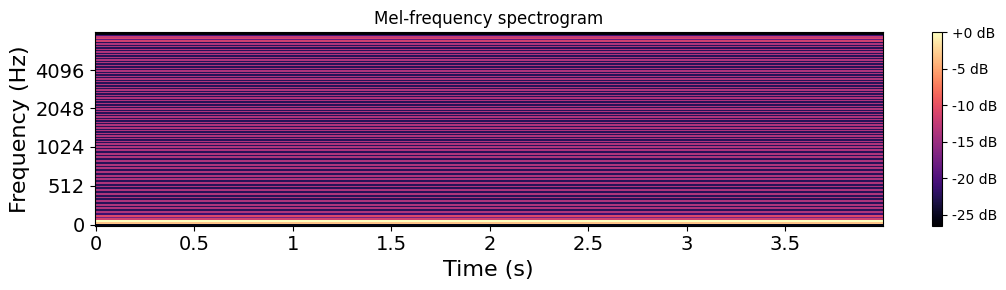

Audio:


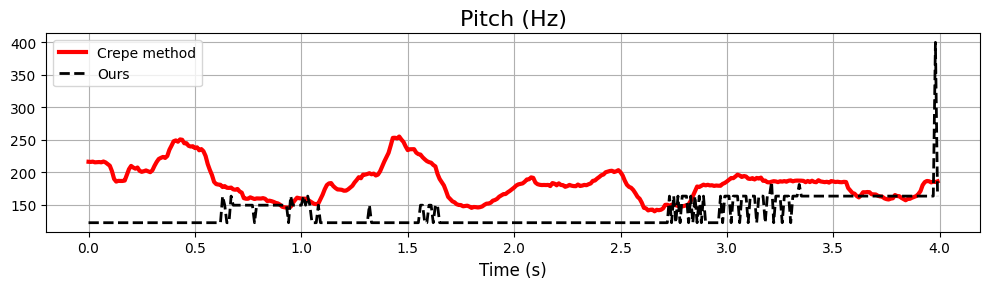

In [ ]:
# @title AnCoGen test {"run":"auto"}
ratio = 100 # @param {"type":"slider","min":0,"max":100,"step":1}
file_name = "test.wav" # @param {"type":"string"}

# === Preprocessing ===
# Load and preprocess the input audio file into a tensor representation
audio = preprocess(file_name)

# -- Select a temporal window to analyze --
# Here we simply take the first LENGTH frames.
current_frame = 0
indices = audio[current_frame:current_frame + LENGTH]

# -- Convert audio indices to a PyTorch tensor and send to GPU if available --
audio = indices.unsqueeze(0).type(torch.LongTensor).to(device)


# -------------------------------------------------------------------------
# Initialize the attribute sequences.
#
# During analysis mode, we do NOT yet have access to the attributes
# (pitch, content, loudness, snr, c50, identity) because they were not
# extracted from the audio at this stage.
#
# AnCoGen, however, always expects a tensor for each attribute.
# Therefore, we initialize placeholder tensors with the correct shapes.
# Their numerical values do not matter here, because the attributes will
# be masked and reconstructed by the model anyway.
# -------------------------------------------------------------------------
pitch = torch.rand(LENGTH).unsqueeze(0).type(torch.LongTensor).to(device)       # Pitch curve
content = torch.rand(LENGTH // 2, 1).unsqueeze(0).type(torch.LongTensor).to(device)  # Content embedding (shorter seq)
loudness = torch.rand(LENGTH).unsqueeze(0).type(torch.LongTensor).to(device)    # Loudness feature
snr = torch.rand(LENGTH).unsqueeze(0).type(torch.LongTensor).to(device)         # Signal-to-Noise Ratio
c50 = torch.rand(LENGTH).unsqueeze(0).type(torch.LongTensor).to(device)         # Clarity index (speech intelligibility)
identity = torch.rand(LENGTH).unsqueeze(0).type(torch.LongTensor).to(device)    # Speaker identity embedding


# -------------------------------------------------------------------------
# Convert attributes into tokens compatible with AnCoGen.
# audio_token is already a sequence of discrete indices.
# Everything else requires a call to to_token().
# -------------------------------------------------------------------------
audio_token = audio
pitch_token = to_token(pitch)
loudness_token = to_token(loudness)
snr_token = to_token(snr)
c50_token = to_token(c50)
identity_token = to_token(identity)


# -------------------------------------------------------------------------
# Run the model in inference mode (no gradient computation).
#
# ratio=(0, 1) means:
#     - audio ratio = 0  → audio is *not* masked
#     - attributes ratio = 1  → attributes are fully masked
#
# random=True makes the mask positions random.
#
# predicted: tuple with one prediction per attribute
# mask: the actual mask applied inside the model
# -------------------------------------------------------------------------
with torch.no_grad():  # Disable gradient computation for faster inference
    predicted, mask = ancogen(
        audio_token, pitch_token, content, loudness_token, snr_token, c50_token, identity_token,
        ratio=(torch.tensor(ratio/100), torch.tensor(1.0)),  # Masking strategy: 0=no mask on audio, 1=full mask on attributes
        random=True  # Apply random masking
    )

# Extract the predicted pitch tokens (argmax over classes)
_, pitch_predicted = torch.max(predicted[1].data, -1)

# Reconstruct the continuous pitch sequence from patches
pitch_predicted = unpatchify(pitch_predicted, time_patch=TIME_PATCH)


# === Visualization ===
_, _, masked_signal = post_process(audio_token, predicted[0], mask[0],
                                   plot_bool_masked=True,
                                   plot_bool_original=False,
                                   plot_bool_recon=False)
torchaudio.save(f"masked.wav", masked_signal, 16000)
print("Audio:")
display(Audio("masked.wav", rate=sr))


# Plot the predicted pitch trajectory

audio, sr = torchcrepe.load.audio(file_name)
pitch_with_crepe = torchcrepe.predict(audio, sr, 160, 50, 550, model="tiny", batch_size=1024, device=device)

times = librosa.times_like(pitch_with_crepe.numpy(), sr=sr, hop_length=160)[:400]

plt.figure(figsize=(10, 3))
plt.plot(times, pitch_with_crepe[0, :400], linewidth=3, color='r', label="Crepe method")
plt.plot(times, pitch_predicted.cpu()[0] + 50, "--", linewidth=2, color='black', label="Ours")
plt.title(f"Pitch (Hz)", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

# Analysis with AnCoGen

Based on the AnCoGen model and the functions ([tools](https://colab.research.google.com/drive/1UJHFQPz5l73RZAy3Gcudnc0XXvPkRn5J#scrollTo=pSwtCoJwrPWp)) in the previous section, propose an analysis function to extract attributes from an audio speech signal.

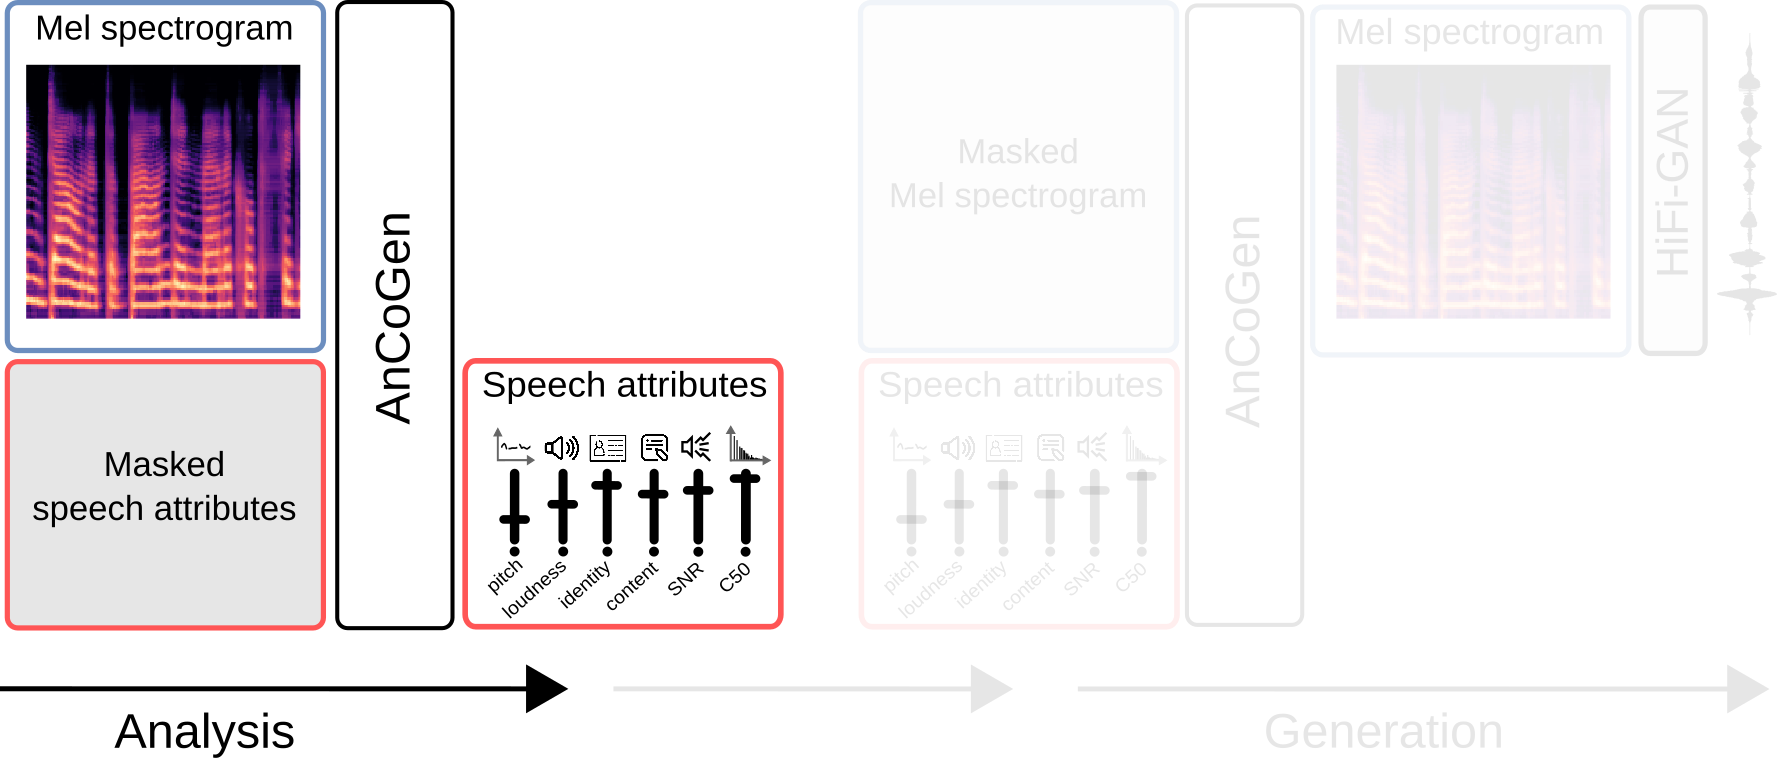

### Task – Implement the `analysis` function

Your first task is to **implement an `analysis` function** that uses the pre-trained AnCoGen model to extract different **speech attributes** from an audio signal.   

This function will be **the starting point** for all following tasks: without it, you won’t be able to analyse an audio sample or visualise its attributes.


In [ ]:
# @title Analysis function
from typing import Union

ATTRIBUTES = dict(audio=0, pitch=1, content=2, loudness=3, snr=4, c50=5, identity=6)

@torch.no_grad()
def analysis(indices: torch.Tensor,
             apply_max: bool = False,
             attribute_name: Union[str, None] = None,
             plot_bool: bool = False):
    """Run an analysis with AnCoGen.

    Parameters
    ----------
    indices : torch.Tensor
        Audio codebook indices (time, ) or (time, 1) as returned by `preprocess`.
    apply_max : bool
        If True, convert logits to discrete tokens using argmax.
    attribute_name : str or None
        If provided, select an attribute to visualize ("pitch", "content", "snr", ...).
    plot_bool : bool
        If True and attribute_name is provided, plot the selected attribute.

    Returns
    -------
    list
        Model predictions for [audio, pitch, content, loudness, snr, c50, identity].
        If apply_max=True, each element is a token tensor.
        Otherwise, each element is a logits tensor.
    """
    # Ensure shape: (batch, time)
    if indices.dim() == 2:
        indices = indices.squeeze(-1)
    if indices.dim() == 1:
        indices = indices.unsqueeze(0)
    audio_token = indices.type(torch.LongTensor).to(device)

    # Placeholder attributes (they will be masked and reconstructed)
    t = audio_token.shape[1]
    pitch_token = torch.zeros((1, t), dtype=torch.long, device=device)
    loudness_token = torch.zeros((1, t), dtype=torch.long, device=device)
    snr_token = torch.zeros((1, t), dtype=torch.long, device=device)
    c50_token = torch.zeros((1, t), dtype=torch.long, device=device)
    identity_token = torch.zeros((1, t), dtype=torch.long, device=device)

    # Content is often at half rate (depends on the model). We use a safe default.
    content_len = max(1, t // 2)
    content_token = torch.zeros((1, content_len, 1), dtype=torch.long, device=device)

    # Analysis: keep audio visible (no mask), fully mask attributes
    predicted, mask = ancogen(
        audio_token,
        pitch_token,
        content_token,
        loudness_token,
        snr_token,
        c50_token,
        identity_token,
        ratio=(torch.tensor(0.0, device=device), torch.tensor(1.0, device=device)),
        random=False,
    )

    # Convert logits -> tokens if requested
    if apply_max:
        out = []
        for p in predicted:
            if p is None:
                out.append(None)
                continue
            if p.dim() >= 3:
                # logits (b, t, n_classes) -> tokens (b, t)
                _, tok = torch.max(p, dim=-1)
                out.append(tok)
            else:
                out.append(p)
        predicted = out

    # Optional plotting for one attribute
    if attribute_name is not None:
        if attribute_name not in ATTRIBUTES:
            raise ValueError(f"Unknown attribute '{attribute_name}'. Choose among {list(ATTRIBUTES.keys())}")

        att_idx = ATTRIBUTES[attribute_name]
        att = predicted[att_idx]

        if plot_bool:
            # Plot tokens if apply_max, else plot argmax over logits
            if not apply_max and att is not None and att.dim() >= 3:
                _, att_plot = torch.max(att, dim=-1)
                att_plot = att_plot.cpu()[0]
            else:
                att_plot = att.cpu()[0]

            plt.figure(figsize=(14, 3))
            plt.plot(att_plot, "--", linewidth=2, color="black")
            plt.title(f"The {attribute_name.upper()} attribute", fontsize=16)
            plt.xlabel("Frames", fontsize=14)
            plt.ylabel(attribute_name, fontsize=14)
            plt.grid(True)
            plt.show()

    return predicted


Plotting: The loudness attribute ...
(400,)


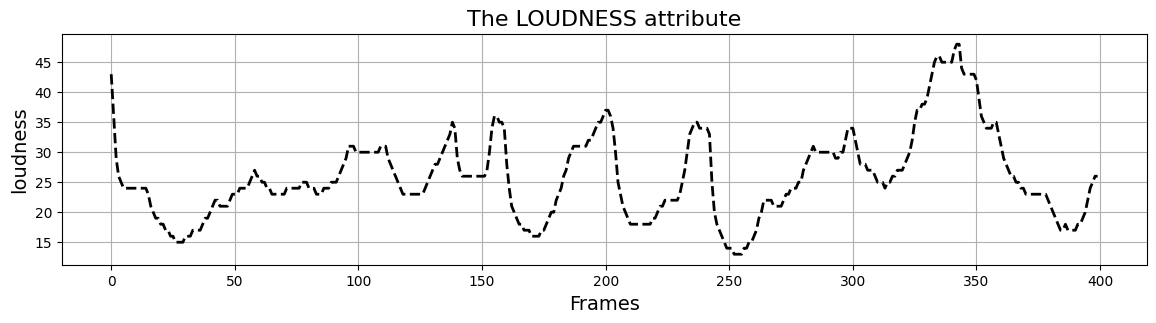

In [ ]:
# @title Test Analysis
variable_name = "loudness" # @param {"type":"string"}
file_name = "test.wav" # @param {"type":"string"}
# Preprocess the audio
audio = preprocess(file_name)

# Analyse the audio with the AnCoGen
attributes = analysis(audio, apply_max=True, attribute_name=variable_name, plot_bool=True)

# Synthesis with AnCoGen

Based on the AnCoGen model and the functions (tools) in the previous section, propose an synthesis function to generate an audio speech signal from the speech attributes.

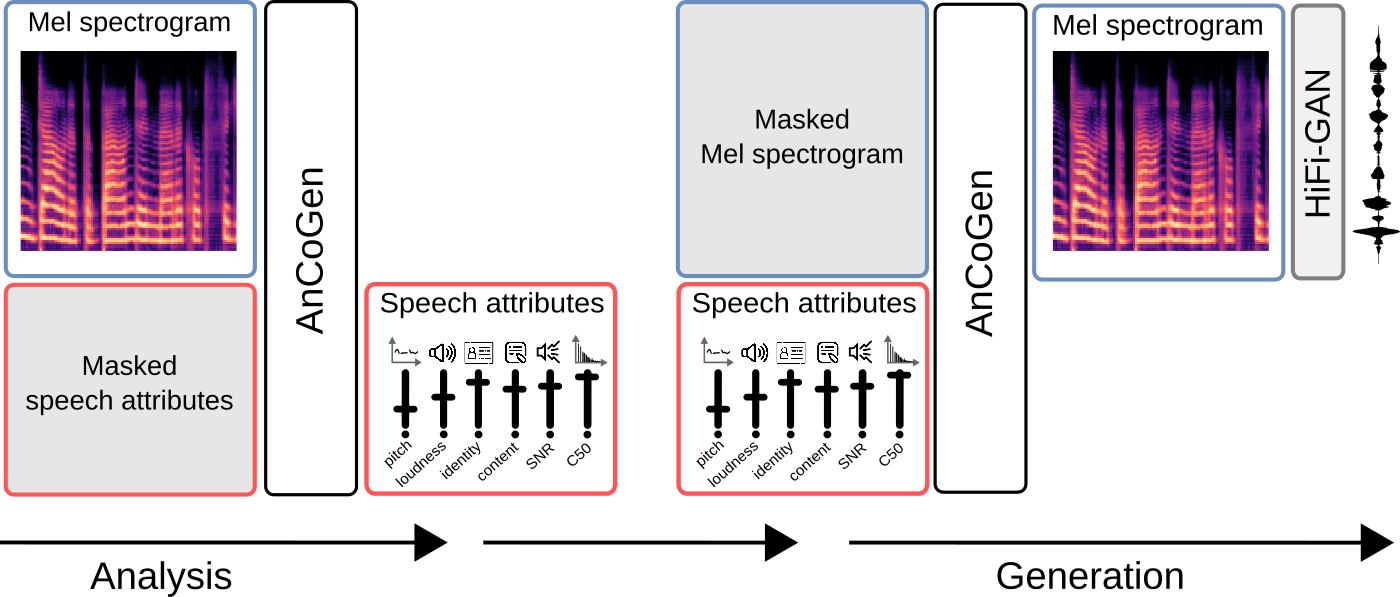

### Task – Implement the `synthesis` function

Your second task is to **implement a synthesis function** that can generate an **audio waveform** from a set of attributes (e.g., pitch, content, loudness, etc.) using the pre-trained AnCoGen model.

This function will allow you to **generate audio from scratch or from modified attributes**, which is essential for tasks like voice conversion and speech enhancement.


In [ ]:
# @title Synthesis function
import os
from typing import Union

@torch.no_grad()
def synthesis(from_attributes: Union[list, tuple, None] = None,
              save_dir: str = "",
              add_str: str = "",
              ratio = (torch.tensor(1.0), torch.tensor(0.0))):
    """Generate an audio signal from a set of attributes.

    Parameters
    ----------
    from_attributes : list/tuple
        Attributes in the order:
        [audio, pitch, content, loudness, snr, c50, identity]
        Each element should be a token tensor (ideally from `analysis(..., apply_max=True)`).
    save_dir : str
        Output directory (optional).
    add_str : str
        Prefix for saved files.
    ratio : tuple(torch.Tensor, torch.Tensor)
        Masking ratio (audio_mask_ratio, attributes_mask_ratio)

    Saves
    -----
    - {add_str}original.wav
    - {add_str}masked.wav
    - {add_str}reconstruction.wav
    """
    if from_attributes is None:
        raise ValueError("from_attributes must be provided (output of analysis with apply_max=True).")

    attributes = list(from_attributes)

    # Ensure proper shapes and device
    def _to_bt(x):
        if x is None:
            return None
        if x.dim() == 1:
            x = x.unsqueeze(0)
        return x.type(torch.LongTensor).to(device)

    audio_token = _to_bt(attributes[0])
    pitch_token = _to_bt(attributes[1])

    # Content may be (b, t) or (b, t, 1); keep it as-is but ensure batch dim
    content = attributes[2]
    if content is None:
        content = torch.zeros((1, max(1, audio_token.shape[1] // 2), 1), dtype=torch.long, device=device)
    else:
        if content.dim() == 2:
            content = content.unsqueeze(-1)
        if content.dim() == 1:
            content = content.unsqueeze(0).unsqueeze(-1)
        content = content.type(torch.LongTensor).to(device)

    loudness_token = _to_bt(attributes[3])
    snr_token = _to_bt(attributes[4])
    c50_token = _to_bt(attributes[5])
    identity_token = _to_bt(attributes[6])

    # Run generation/reconstruction
    predicted, mask = ancogen(
        audio_token,
        pitch_token,
        content,
        loudness_token,
        snr_token,
        c50_token,
        identity_token,
        ratio=ratio,
        random=False,
    )

    # Convert audio logits to indices
    audio_logits = predicted[0]
    if audio_logits.dim() >= 3:
        _, audio_recon = torch.max(audio_logits, dim=-1)  # (b, t)
    else:
        audio_recon = audio_logits

    # Post-process to waveforms
    original_signal, reconstructed_signal, masked_signal = post_process(
        original_indices=audio_token[0].detach().cpu(),
        reconstructed_indices=audio_recon[0].detach().cpu(),
        mask=mask,
        plot_bool_original=False,
        plot_bool_recon=False,
        plot_bool_masked=False,
    )

    # Save outputs
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    torchaudio.save(os.path.join(save_dir, f"{add_str}original.wav"), original_signal.unsqueeze(0), 16000)
    torchaudio.save(os.path.join(save_dir, f"{add_str}masked.wav"), masked_signal.unsqueeze(0), 16000)
    torchaudio.save(os.path.join(save_dir, f"{add_str}reconstruction.wav"), reconstructed_signal.unsqueeze(0), 16000)

    return original_signal, reconstructed_signal, masked_signal


Original Mel-Spectrogram:


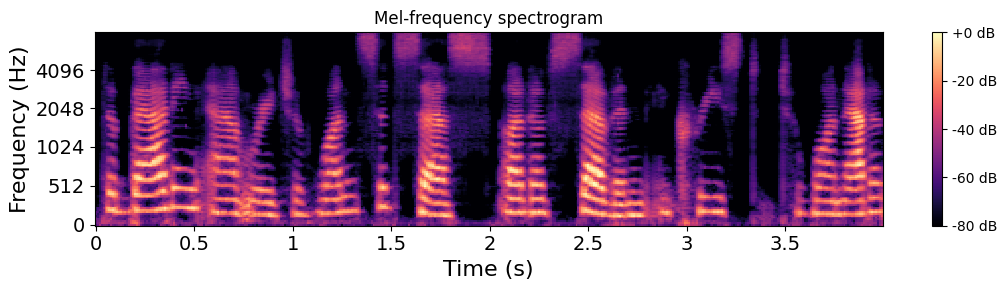

Reconstructed Mel-Spectrogram:


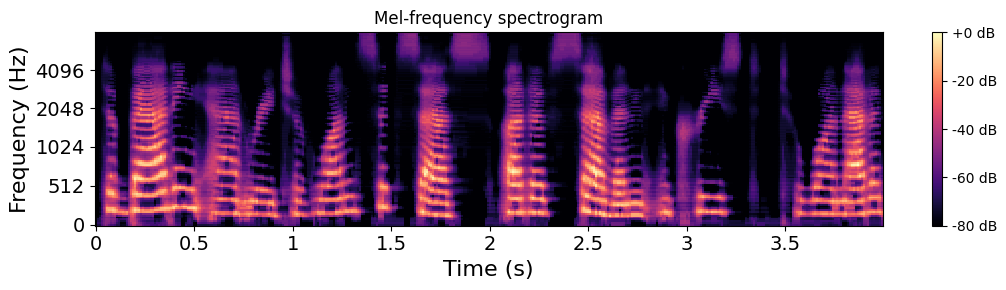

Original: 


Masked (Be careful, it s quite strong): 


Sythesis with AnCoGen: 


In [ ]:
# @title Test Synthesis {"run":"auto"}
file_name = "test.wav" # @param {"type":"string"}
ratio_mask_attributes = 0 # @param {"type":"slider","min":0,"max":100,"step":1}
# Preprocess the audio
audio = preprocess(file_name)

# Analyse the audio with the AnCoGen
attributes = analysis(audio, apply_max=True)

# Synthesis the audio with the AnCoGen
synthesis(from_attributes=attributes, ratio=(torch.tensor(1.0),
                                             torch.tensor(ratio_mask_attributes/100))
          )

# Play the trimmed audio
print('Original: ')
display(Audio("original.wav", rate=sr))

# Be careful, it's quite strong
print('Masked (Be careful, it s quite strong): ')
display(Audio("masked.wav", rate=sr))

print('Sythesis with AnCoGen: ')
Audio("reconstruction.wav", rate=sr)

# Speech enhancement with AnCoGen

Based on the AnCoGen model and the functions (tools) in the previous section, propose an synthesis function to generate an audio speech signal from the speech attributes.

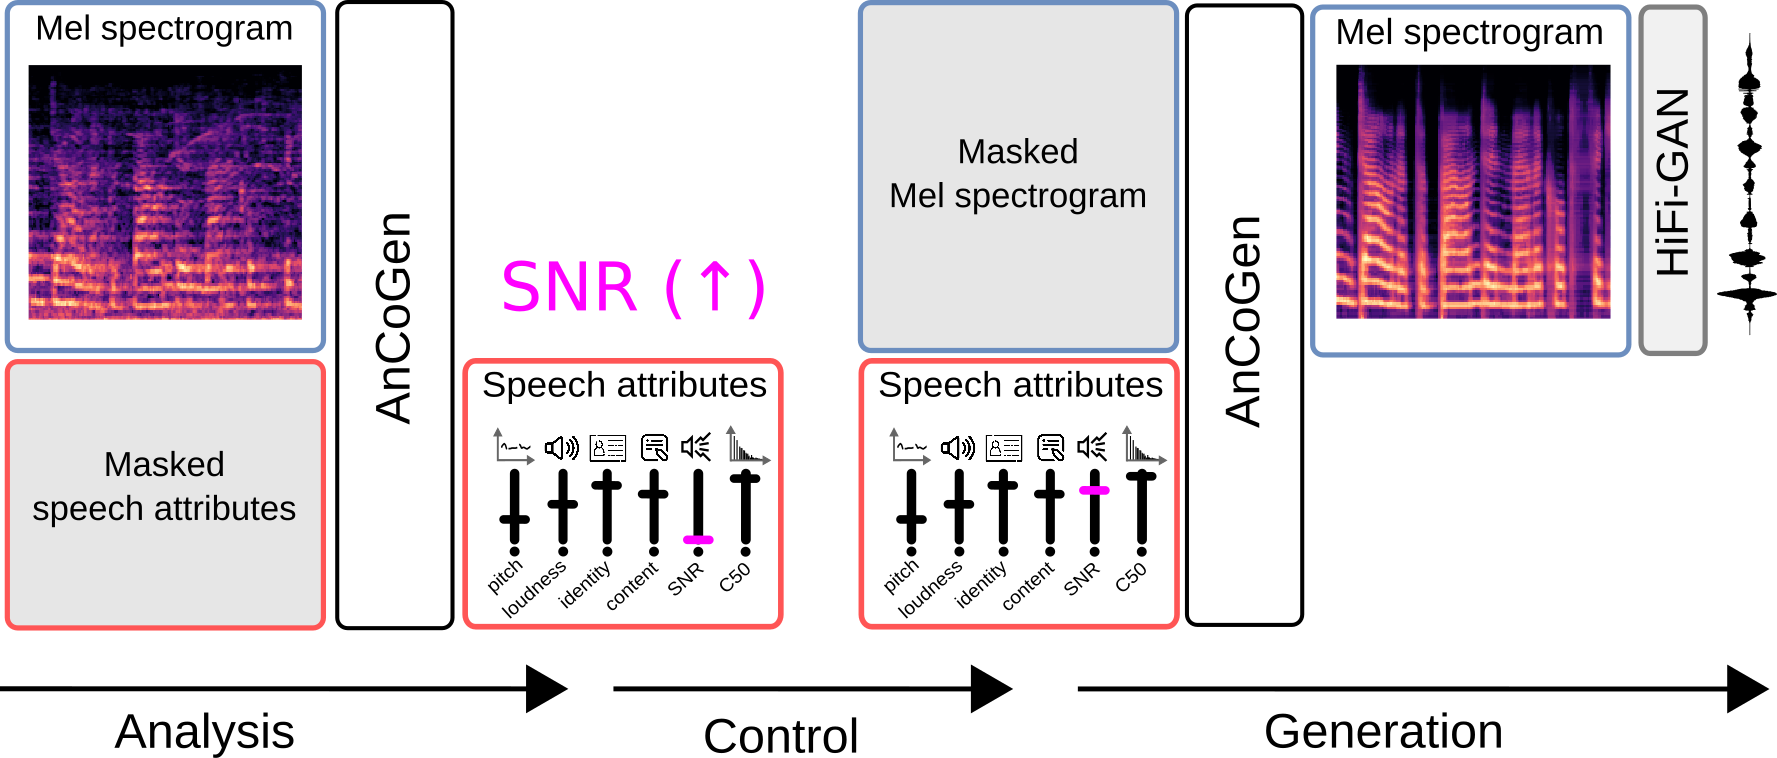

### Guide for implementing `snr_control`

The goal of this function is to modify the SNR (Signal-to-Noise Ratio) of a signal before generating it with the `synthesis` function. Here’s how to approach it:

1. **Attributes list**: The function receives a list of attributes for the signal. The SNR is stored at index `4`.

2. **Target SNR**:
   - If `target` is an **integer**, you should **add it to the current SNR**:  
     `snr_new = snr_old + target`.  
   - Use `torch.clip` to make sure the SNR stays within `[0, 80]`.

3. **Using the current SNR**: If no target is provided, the function should keep the current SNR from `attributes[4]`.

4. **Update the attributes**: Replace the old SNR value in the attributes list with the new one.

5. **Generate the signal**: Call the `synthesis` function with the updated attributes, converting the list to a tuple (`tuple(attributes)`) and passing any extra arguments via `**kwargs`.

Following these steps ensures that the generated signal will respect the desired SNR while keeping other attributes unchanged.



In [ ]:
# @title snr_control function (à cacher aux élèves)
from typing import Union

def snr_control(attributes: Union[list, tuple], target: Union[int, torch.Tensor], **kwargs):
    """Control the SNR (Signal-to-Noise Ratio) of the generated audio.

    Parameters
    ----------
    attributes : list/tuple
        Attributes returned by `analysis(..., apply_max=True)`:
        [audio, pitch, content, loudness, snr, c50, identity]
    target : int or torch.Tensor
        Target SNR value (in dB). If int, we broadcast it over time.
    **kwargs :
        Additional keyword arguments passed to `synthesis`.

    Returns
    -------
    (original_signal, reconstructed_signal, masked_signal)
        Returned by `synthesis`.
    """
    attrs = list(attributes)

    # Determine time length from audio tokens
    audio_token = attrs[0]
    if audio_token.dim() == 2:
        t = audio_token.shape[1]
    else:
        t = audio_token.shape[0]

    # Build SNR tensor
    if isinstance(target, int):
        snr = torch.full((1, t), float(target), device=device)
    elif isinstance(target, torch.Tensor):
        snr = target.to(device)
        if snr.dim() == 1:
            snr = snr.unsqueeze(0)
        # If scalar, broadcast
        if snr.numel() == 1:
            snr = snr.repeat(1, t)
        # If wrong length, crop/pad
        if snr.shape[1] != t:
            snr = F.interpolate(snr.unsqueeze(1), size=t, mode="nearest").squeeze(1)
    else:
        raise NotImplementedError("target must be int or torch.Tensor")

    # Clip SNR in a reasonable range
    snr = torch.clamp(snr, 0.0, 80.0)

    # Update attribute (index 4 is SNR)
    attrs[4] = snr.type(torch.LongTensor)

    # Generate with updated SNR
    return synthesis(from_attributes=attrs, add_str="denoising_", **kwargs)


Original Mel-Spectrogram:


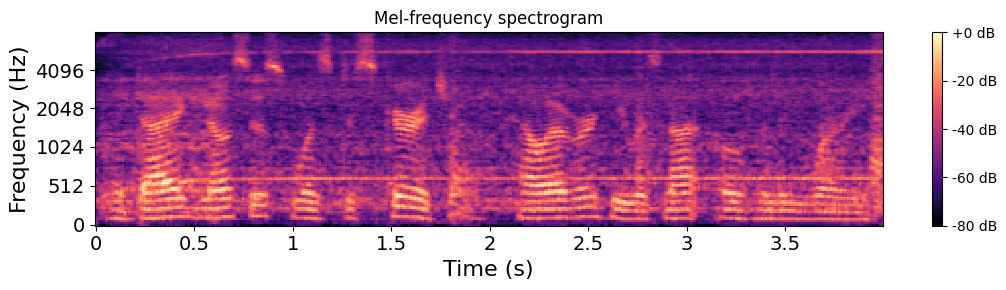

Reconstructed Mel-Spectrogram:


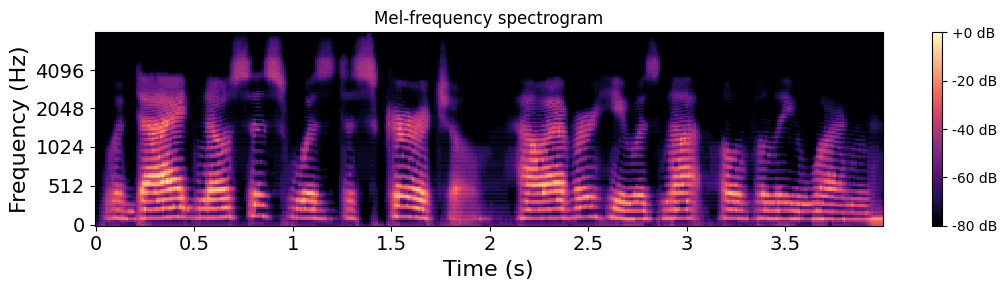

Noised Signal: 


Enhanced with AnCoGen: 


In [ ]:
# @title SNR control {"run":"auto"}
file_name = "test-with-noise-2.wav" # @param {"type":"string"}
snr_target = 30 # @param {"type":"slider","min":0,"max":60,"step":5}

# Preprocess the audio
audio = preprocess(file_name)

# Analyse the audio with the AnCoGen
attributes = analysis(audio, apply_max=True)

# Speech enhancement with the AnCoGen
snr_control(attributes=attributes, target=snr_target)

print('Noised Signal: ')
display(Audio("denoising_original.wav", rate=sr))

print('Enhanced with AnCoGen: ')
Audio("denoising_reconstruction.wav", rate=sr)

# Voice Conversion with AnCoGen (option)


